In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [92]:
df = pd.read_csv('/content/drive/MyDrive/Expedia/Data/main.tsv.gz', compression='gzip', sep='\t', nrows=100000)

In [ ]:
df[df['applied_filters'].notna()].head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."
5,0152236295041a611d45ed97353d73df,cc8875772f124695111939cc8c08e59a,2021-06-10T14:49:00.000Z,2,1,1,9,2021-06-10,2021-06-11,2,0,0,1,RECOMMENDED,PRICE:0,"1,3894329,0,5.0,1025.0,3.0,0,1,4,0,0|2,2785866..."
14,018e7d1f2484459af14daf74d8aabb95,dd89d215b0a608de71666da440e3fdcc,2021-06-18T21:20:00.000Z,6,4,0,1,2021-08-01,2021-08-06,2,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,3955773,0,4.0,225.0,3.0,1,0,2,0,0|2,3091054,..."
16,022618a80fb6c8614855c66204e0e03b,daabcde78180d12e2f99dc933ae43e3c,2021-06-28T13:29:00.000Z,11,4,0,143,2021-08-19,2021-08-22,6,0,0,1,RECOMMENDED,MEALPLAN:ALL_INCLUSIVE,"1,6934307,0,0.0,0.0,null,0,0,null,0,0|2,512506..."
17,023fc9d701c799c627bb9fc68fa55816,197e29f822ed8ef83b9d339b892ced5e,2021-06-19T02:20:00.000Z,3,2,0,7811,2021-06-19,2021-06-20,2,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6365186,0,5.0,475.0,4.0,0,0,5,0,0|2,2063282,..."


In [ ]:
len(df['point_of_sale'].value_counts())

179

In [ ]:
len(df['geo_location_country'].value_counts())

219

In [ ]:
len(df['destination_id'].value_counts())

71026

In [ ]:
df['is_mobile'].value_counts()

is_mobile
0    1464515
1    1113294
Name: count, dtype: int64

In [5]:
impressions_test = df['impressions'][0]

In [6]:
impressions_test = impressions_test.split('|')

In [7]:
impressions_test

['1,5695234,1,4.0,250.0,2.0,1,0,3,0,0',
 '2,1734546,1,4.0,1000.0,2.0,1,0,4,0,0',
 '3,5675938,0,5.0,700.0,3.0,1,0,3,0,0',
 '4,5695234,0,4.0,250.0,2.0,1,0,3,0,0',
 '5,2012023,0,4.0,625.0,2.0,0,0,1,0,0',
 '6,309921,0,5.0,525.0,3.0,1,0,5,0,0',
 '7,2722643,0,4.0,75.0,3.0,1,1,2,1,0',
 '8,1734546,0,4.0,1000.0,2.0,1,0,4,0,0',
 '9,1197530,0,4.0,250.0,3.0,1,0,2,1,0',
 '10,2951009,0,4.0,575.0,2.0,1,1,4,0,0',
 '11,253160,0,4.0,650.0,3.0,1,0,5,0,0',
 '12,4869920,0,4.0,225.0,3.0,1,0,1,4,0',
 '13,1329950,0,5.0,225.0,3.0,1,0,4,0,0',
 '14,5608470,0,4.0,1025.0,2.0,0,0,4,0,0',
 '15,1866033,0,5.0,775.0,3.0,0,0,5,0,0',
 '16,465816,0,4.0,425.0,3.0,1,0,4,0,0',
 '17,6939020,0,4.0,50.0,3.0,1,0,2,0,0',
 '18,4510738,0,4.0,275.0,3.0,1,0,1,0,0',
 '19,1117381,0,5.0,25.0,3.0,1,0,5,0,0',
 '20,6907341,0,4.0,325.0,3.0,1,0,3,0,0',
 '21,4418490,0,4.0,225.0,3.0,1,0,4,0,0',
 '22,6794958,0,3.0,225.0,2.0,1,0,1,0,0',
 '23,2815253,0,4.0,150.0,3.0,1,1,1,0,0',
 '24,5168834,0,3.0,950.0,2.0,1,0,2,0,0',
 '25,5190616,0,4.0,1725.0,3.

In [14]:
ranking = []
clicks = []
bookings = []
for i in df['impressions']:
  a = i.split('|')
  for j in a:
    j=j.split(',')
    ranking.append(int(j[0]))
    clicks.append(int(j[-2]))
    bookings.append(int(j[-1]))

In [15]:
#Not Sure if this works properly
sublist_r = []
sublist_c = []
sublist_b = []
sublists_rank = []
sublists_click = []
sublists_book = []

for i, value in enumerate(ranking):
    if value == 1 and i != 0:
        sublists_rank.append(sublist_r)
        sublists_click.append(sublist_c)
        sublists_book.append(sublist_b)
        sublist_r = []
        sublist_c = []
        sublist_b = []
    else:
        sublist_r.append(value)
        sublist_c.append(clicks[i])
        sublist_b.append(bookings[i])

# Append the last sublist
sublists_rank.append(sublist_r)
sublists_click.append(sublist_c)
sublists_book.append(sublist_b)

In [17]:
sublist_r = []
sublist_c = []
sublist_b = []
sublists_rank = []
sublists_click = []
sublists_book = []

for i, value in enumerate(ranking):
    sublist_r.append(value)
    sublist_c.append(clicks[i])
    sublist_b.append(bookings[i])

    # Check if the next value is 1 or if it's the last value
    if (i < len(ranking) - 1 and ranking[i + 1] == 1) or i == len(ranking) - 1:
        sublists_rank.append(sublist_r)
        sublists_click.append(sublist_c)
        sublists_book.append(sublist_b)
        sublist_r = []
        sublist_c = []
        sublist_b = []

In [18]:
#Not sure if this works properly
def compute_ndcg(rankings, clicks, bookings):
    """
    Compute Normalized Discounted Cumulative Gain (NDCG) for a list of rankings, clicks, and bookings.
    :param rankings: List of rankings for each search ID.
    :param clicks: List of clicks for each search ID.
    :param bookings: List of bookings for each search ID.
    :return: NDCG for each search ID and average NDCG.
    """
    ndcg_scores = []
    for rank, click, booking in zip(rankings, clicks, bookings):
        # Calculate relevance scores based on clicks and bookings
        relevance = np.where(booking > 0, 2 * booking, np.where(click > 0, click, 0))

        # Calculate Discounted Cumulative Gain (DCG)
        dcg = np.sum(relevance / np.log2(np.arange(2, len(rank) + 2)))

        # Calculate Ideal DCG (IDCG)
        ideal_relevance = sorted(relevance, reverse=True)
        idcg = np.sum(ideal_relevance / np.log2(np.arange(2, len(rank) + 2)))

        # Calculate NDCG
        if idcg == 0:  # Handle the case when all items have relevance score 0
            ndcg = 0
        else:
            ndcg = dcg / idcg
        ndcg_scores.append(ndcg)

    avg_ndcg = np.mean(ndcg_scores)
    return ndcg_scores, avg_ndcg

In [19]:
def compute_ndcg(rankings, clicks, bookings):
    """
    Compute Normalized Discounted Cumulative Gain (NDCG) for a list of rankings, clicks, and bookings.
    :param rankings: List of rankings for each search ID.
    :param clicks: List of clicks for each search ID.
    :param bookings: List of bookings for each search ID.
    :return: NDCG for each search ID and average NDCG.
    """
    ndcg_scores = []
    for rank, click, booking_list in zip(rankings, clicks, bookings):
        # Calculate relevance scores based on clicks and bookings
        relevance = []
        for booking, click_count in zip(booking_list, click):
            if booking > 0:
                relevance.append(2 * booking)
            elif click_count > 0:
                relevance.append(click_count)
            else:
                relevance.append(0)

        # Calculate Discounted Cumulative Gain (DCG)
        dcg = np.sum(relevance / np.log2(np.arange(2, len(rank) + 2)))

        # Calculate Ideal DCG (IDCG)
        ideal_relevance = sorted(relevance, reverse=True)
        idcg = np.sum(ideal_relevance / np.log2(np.arange(2, len(rank) + 2)))

        # Calculate NDCG
        if idcg == 0:  # Handle the case when all items have relevance score 0
            ndcg = 0
        else:
            ndcg = dcg / idcg
        ndcg_scores.append(ndcg)

    avg_ndcg = np.mean(ndcg_scores)
    return ndcg_scores, avg_ndcg

In [20]:
ndcg_scores, avg_ndcg = compute_ndcg(sublists_rank, sublists_click, sublists_book)

In [21]:
avg_ndcg

0.12480230971587847

#EXPLODING AND CONCATENATING FEATURES

In [23]:
df.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,..."
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0"
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759..."
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059..."
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."


In [93]:
import pandas as pd
import hashlib

# Function to convert string to integer ID
def convert_to_int_id(string):
    # Convert string to bytes and hash it using MD5
    hash_object = hashlib.md5(string.encode())
    # Convert hexadecimal digest to integer
    int_id = int(hash_object.hexdigest(), 16)
    return int_id

# Load your dataframe
# df = pd.read_csv('your_file.csv')

# Create a new column with integer IDs
df['search_id'] = pd.factorize(df['search_id'].apply(convert_to_int_id))[0]
df['user_id'] = pd.factorize(df['user_id'].apply(convert_to_int_id))[0]

# Now df['search_id_int'] contains unique integer IDs corresponding to each alphanumeric string


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   user_id               100000 non-null  int64 
 1   search_id             100000 non-null  int64 
 2   search_timestamp      100000 non-null  object
 3   point_of_sale         100000 non-null  int64 
 4   geo_location_country  100000 non-null  int64 
 5   is_mobile             100000 non-null  int64 
 6   destination_id        100000 non-null  int64 
 7   checkin_date          99993 non-null   object
 8   checkout_date         99993 non-null   object
 9   adult_count           100000 non-null  int64 
 10  child_count           100000 non-null  int64 
 11  infant_count          100000 non-null  int64 
 12  room_count            100000 non-null  int64 
 13  sort_type             100000 non-null  object
 14  applied_filters       33402 non-null   object
 15  impressions       

In [ ]:
df['length_of_stay']=(pd.to_datetime(df['checkout_date'])-pd.to_datetime(df['checkin_date'])).dt.days



In [113]:
df['booking_window'] = ((pd.to_datetime(df['checkin_date'], utc=True))  - pd.to_datetime(df['search_timestamp'], utc=True)).dt.days

In [126]:
df['booking_window'] = df['booking_window'].apply(lambda x: 0 if x < 0 else x)

In [127]:
df.loc[df['booking_window'] <0 ][['search_timestamp','checkin_date','booking_window']]

,search_timestamp,checkin_date,booking_window


In [128]:
#df['booking_window'].unique()
import plotly.express as px

# Assuming 'df' is your DataFrame and 'booking_window' is the column you want to plot
fig = px.histogram(df, x='booking_window', nbins=30,
                   title='Distribution of Booking Window',
                   labels={'booking_window': 'Booking Window (days)'})  # Labeling the x-axis
fig.update_layout(yaxis_title='Frequency')  # Labeling the y-axis
fig.show()

In [151]:


# Assuming 'df' is your DataFrame and 'booking_window' is the column you want to plot
fig = px.histogram(df, x='booking_window', nbins=90,
                   title='Distribution of Booking Window',
                   labels={'booking_window': 'Booking Window (days)'})

fig.update_layout(xaxis=dict(range=[-1, 90]),  # Adjusting range to better fit the data up to 180 days
                  yaxis_title='Frequency')

# Calculate count for same-day bookings (booking_window = 0)
count_same_day = (df['booking_window'] == 0).sum()

# Add annotation for same-day bookings
offset = max(df['booking_window'].value_counts()) * 0.001

fig.add_annotation(x=7, y=3*count_same_day , text=f'Same-day booking: {count_same_day}',
                   showarrow=False, font=dict(size=16, color='black', family='Arial, bold'))


fig.show()

In [142]:
count_same_day

12135

In [130]:
fig = px.histogram(df, x='booking_window', nbins=12,
                   title='Distribution of Booking Window by Month',
                   labels={'booking_window': 'Booking Window (Months)'},
                   range_x=[0, 360])
fig.update_layout(xaxis=dict(tickmode='array',
                             tickvals=[15 + 30*i for i in range(12)],
                             ticktext=[f'{i+1}' for i in range(12)]),
                  xaxis_title='Booking Window (Months in advance)',
                  yaxis_title='Frequency')
fig.show()

In [152]:
df.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions,length_of_stay,booking_window
0,0,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,...",1.0,1.0
1,1,1,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0",4.0,78.0
2,2,2,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759...",5.0,26.0
3,3,3,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059...",3.0,39.0
4,4,4,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,...",5.0,53.0


In [109]:
df[['search_id','impressions']].head()

,search_id,impressions
0,0,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,..."
1,1,"1,5151135,0,null,null,null,1,1,1,0,0"
2,2,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759..."
3,3,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059..."
4,4,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."


In [75]:
import pandas as pd
from tqdm import tqdm

impression_column_names=['rank','prop_id','is_travel_ad','review_rating','review_count','star_rating','is_free_cancellation', 'is_drr','price_bucket','num_clicks','is_trans']

exploded_column_names = ['search_id'] + impression_column_names
exploded_rows = []

for index, row in tqdm(df.iterrows(), total=len(df), desc="Splitting impressions", unit="row"):
    for impression in row['impressions'].split('|'):
        exploded_rows.append([row['search_id']] + impression.split(','))

exploded_df = pd.DataFrame(exploded_rows, columns=exploded_column_names)
print(exploded_df.head())


Splitting impressions: 100%|██████████| 100000/100000 [01:02<00:00, 1590.95row/s]


   search_id rank  prop_id is_travel_ad review_rating review_count  \
0          0    1  5695234            1           4.0        250.0   
1          0    2  1734546            1           4.0       1000.0   
2          0    3  5675938            0           5.0        700.0   
3          0    4  5695234            0           4.0        250.0   
4          0    5  2012023            0           4.0        625.0   

  star_rating is_free_cancellation is_drr price_bucket num_clicks is_trans  
0         2.0                    1      0            3          0        0  
1         2.0                    1      0            4          0        0  
2         3.0                    1      0            3          0        0  
3         2.0                    1      0            3          0        0  
4         2.0                    0      0            1          0        0  


In [89]:
exploded_df.head()

,search_id,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans
0,0,1,5695234,1,4.0,250.0,2.0,1,0,3,0,0
1,0,2,1734546,1,4.0,1000.0,2.0,1,0,4,0,0
2,0,3,5675938,0,5.0,700.0,3.0,1,0,3,0,0
3,0,4,5695234,0,4.0,250.0,2.0,1,0,3,0,0
4,0,5,2012023,0,4.0,625.0,2.0,0,0,1,0,0


# Playing with pola.rs library

In [69]:
import polars as pl

exploded_column_names = ['search_id'] + impression_column_names
exploded_rows = []

with tqdm(total=len(df), desc="Splitting impressions", unit="row") as pbar:
    for index, row in df.iterrows():
        for impression in row['impressions'].split('|'):
            exploded_rows.append([row['search_id']] + impression.split(','))
        pbar.update(1)

exploded_df = pl.DataFrame(exploded_rows)
exploded_df.columns = exploded_column_names


Splitting impressions: 100%|██████████| 100000/100000 [00:53<00:00, 1863.16row/s]


In [76]:
exploded_df_copy=exploded_df.copy()
exploded_df_copy.head()

,search_id,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans
0,0,1,5695234,1,4.0,250.0,2.0,1,0,3,0,0
1,0,2,1734546,1,4.0,1000.0,2.0,1,0,4,0,0
2,0,3,5675938,0,5.0,700.0,3.0,1,0,3,0,0
3,0,4,5695234,0,4.0,250.0,2.0,1,0,3,0,0
4,0,5,2012023,0,4.0,625.0,2.0,0,0,1,0,0


In [77]:
columns_converted = ['rank', 'prop_id', 'is_travel_ad', 'review_rating', 'review_count', 'star_rating',
                     'is_free_cancellation', 'is_drr', 'price_bucket', 'num_clicks', 'is_trans']

# Use tqdm to track progress across columns
for column in tqdm(columns_converted, desc="Converting columns"):
    exploded_df_copy[column] = pd.to_numeric(exploded_df_copy[column], errors='coerce')



Converting columns: 100%|██████████| 11/11 [00:36<00:00,  3.33s/it]


In [78]:
df_amenities = pd.read_csv('/content/drive/MyDrive/Expedia/Data/amenities.tsv.gz', compression='gzip', sep='\t')

In [79]:
exploded_df_merged = exploded_df_copy.merge(df_amenities, on='prop_id', how='left')

In [80]:
exploded_df_merged.shape

(7107685, 30)

In [88]:
exploded_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7107685 entries, 0 to 7107684
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   search_id                  int64  
 1   rank                       int64  
 2   prop_id                    int64  
 3   is_travel_ad               int64  
 4   review_rating              float64
 5   review_count               float64
 6   star_rating                float64
 7   is_free_cancellation       int64  
 8   is_drr                     int64  
 9   price_bucket               float64
 10  num_clicks                 int64  
 11  is_trans                   int64  
 12  AirConditioning            float64
 13  AirportTransfer            float64
 14  Bar                        float64
 15  FreeAirportTransportation  float64
 16  FreeBreakfast              float64
 17  FreeParking                float64
 18  FreeWiFi                   float64
 19  Gym                        float64
 20  Hi

In [ ]:
exploded_df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,...,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [84]:
#file_path = '/content/drive/My Drive/Expedia/Data/exploded_df_merged_amenities_100Krows_Exploded_to_7Million.csv'
exploded_df_merged.to_parquet('/content/drive/My Drive/Expedia/Data/exploded_df_merged_100Krows_7Million.parquet', index=False)

#exploded_df_merged.to_csv(file_path, index=False)

#exploded_df=pd.read_csv("/content/drive/My Drive/Expedia/Data/exploded_df_merged_amenities.csv", sep=',')


In [87]:
exploded_df_merged.columns

Index(['search_id', 'rank', 'prop_id', 'is_travel_ad', 'review_rating',
       'review_count', 'star_rating', 'is_free_cancellation', 'is_drr',
       'price_bucket', 'num_clicks', 'is_trans', 'AirConditioning',
       'AirportTransfer', 'Bar', 'FreeAirportTransportation', 'FreeBreakfast',
       'FreeParking', 'FreeWiFi', 'Gym', 'HighSpeedInternet', 'HotTub',
       'LaundryFacility', 'Parking', 'PetsAllowed', 'PrivatePool',
       'SpaServices', 'SwimmingPool', 'WasherDryer', 'WiFi'],
      dtype='object')

In [ ]:
# Count the number of filters in each row
filter_counts = exploded_df['applied_filters'].str.count('|') + 1

# Filter the DataFrame for rows where the number of filters is >= 80
filtered_df = exploded_df[filter_counts >= 80].index

filtered_df




Index([17987, 17988, 17989, 17990, 17991, 17992, 17993, 17994, 17995, 17996,
       ...
       67113, 67114, 67115, 67116, 67117, 67118, 67119, 67120, 67121, 67122],
      dtype='int64', length=600)

In [ ]:
exploded_df.iloc[17987]['applied_filters'].split('|')

['LODGING:APARTMENT',
 'LODGING:CABIN',
 'LODGING:CHALET',
 'LODGING:CONDO',
 'LODGING:COTTAGE',
 'LODGING:HOUSEBOAT',
 'LODGING:VILLA',
 'LODGING:VACATIONHOME']

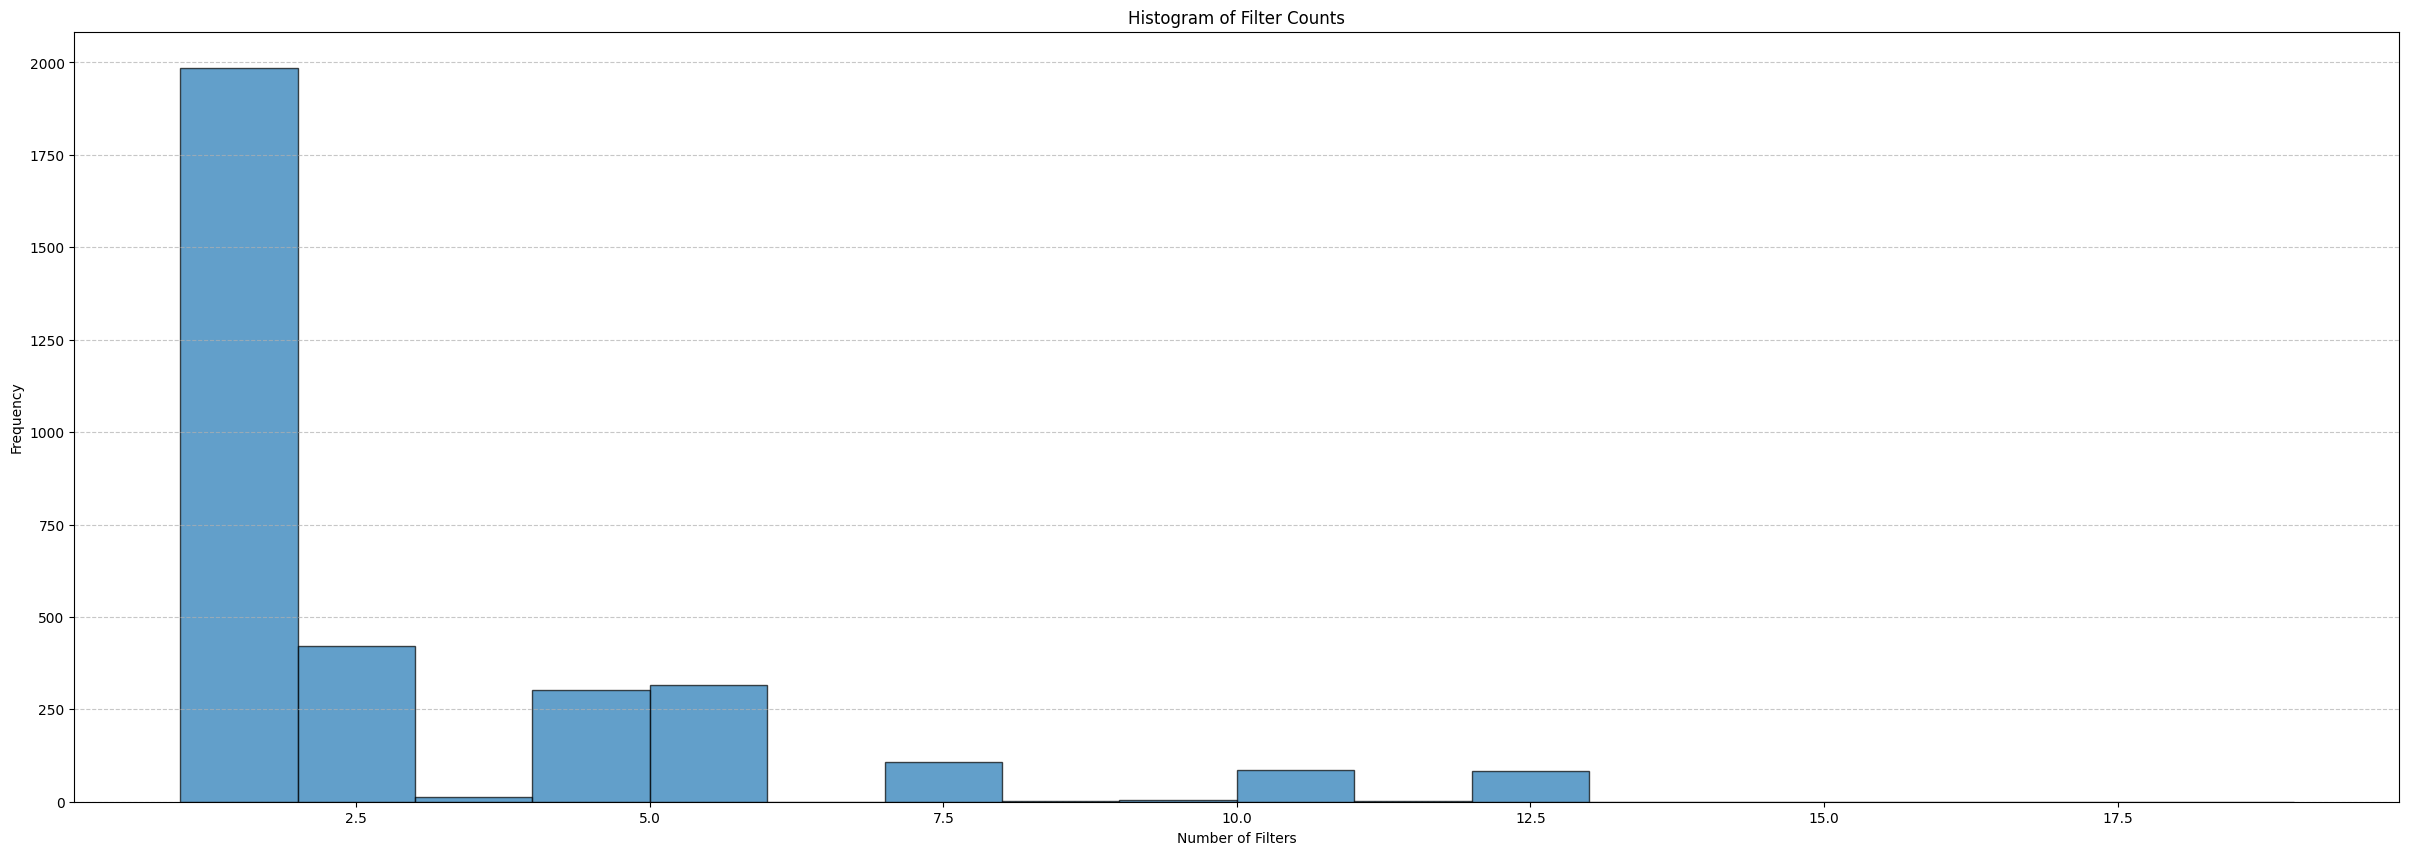

In [ ]:
# exploded_df[~exploded_df['applied_filters'].isna()]['applied_filters'] # display only rows with applied filters
#filter_counts = (exploded_df[~exploded_df['applied_filters'].isna()]['applied_filters'].str.count('|') + 1).astype(int)
filter_counts = exploded_df['applied_filters'].str.count('\|')

# Plot histogram
plt.figure(figsize=(30, 10))
plt.hist(filter_counts, np.arange(1, 20, 1), edgecolor='black', alpha=0.7)
plt.xlabel('Number of Filters')
plt.ylabel('Frequency')
plt.title('Histogram of Filter Counts')
#plt.xticks(range(1, filter_counts.max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:

exploded_df['applied_filters'][:10].unique()

array([nan, 'VIPONLY:FALSE', 'PRICE:0', 'MEALPLAN:ALL_INCLUSIVE',
       'AMENITY:7', 'PROPERTYNAME:XXX|MEALPLAN:FREE_BREAKFAST',
       'MEALPLAN:FREE_BREAKFAST', 'STAR:4.0', 'AMENITY:72', 'AMENITY:71',
       'STAR:3.0|STAR:4.0|STAR:5.0|LODGING:HOTEL|MEALPLAN:FREE_BREAKFAST|REVIEWSCORE:',
       'AMENITY:72|STAR:3.0|STAR:4.0|STAR:5.0|LODGING:CONDO',
       'AMENITY:72|STAR:3.0|STAR:4.0|STAR:5.0|LODGING:HOTEL|MEALPLAN:FREE_BREAKFAST',
       'STAR:3.0|STAR:4.0', 'STAR:4.0|STAR:5.0', 'STAR:5.0', 'AMENITY:66',
       'AMENITY:66|REVIEWSCORE:', 'AMENITY:14|AMENITY:19',
       'AMENITY:19|AMENITY:14|MEALPLAN:ALL_INCLUSIVE',
       'AMENITY:19|AMENITY:14', 'AMENITY:19|AMENITY:14|AMENITY:72',
       'LODGING:APARTMENT|LODGING:CABIN|LODGING:CHALET|LODGING:CONDO|LODGING:COTTAGE|LODGING:HOUSEBOAT|LODGING:VILLA|LODGING:VACATIONHOME',
       'LODGING:VILLA|LODGING:COTTAGE|LODGING:APARTMENT|LODGING:CABIN|LODGING:HOUSEBOAT|LODGING:VACATIONHOME|LODGING:CHALET|LODGING:CONDO|REVIEWSCORE:4.0:5.0',
   

In [ ]:

# Assuming your DataFrame is named df and the column containing filters is named 'applied_filters'
#filters_exploded_df = exploded_df.assign(applied_filters=exploded_df['applied_filters'].str.split('|')).explode('applied_filters')

filters_exploded_df = exploded_df['applied_filters'].str.split('|').explode('applied_filters')




In [ ]:
filters_exploded_df.head()


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: applied_filters, dtype: object

In [ ]:
exploded_df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,...,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_merged = pd.read_csv('/content/drive/MyDrive/Expedia/Data/exploded_df_merged_amenities.csv')

In [ ]:
df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,...,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_amenities.columns

Index(['prop_id', 'AirConditioning', 'AirportTransfer', 'Bar',
       'FreeAirportTransportation', 'FreeBreakfast', 'FreeParking', 'FreeWiFi',
       'Gym', 'HighSpeedInternet', 'HotTub', 'LaundryFacility', 'Parking',
       'PetsAllowed', 'PrivatePool', 'SpaServices', 'SwimmingPool',
       'WasherDryer', 'WiFi'],
      dtype='object')

In [ ]:
for i in df_amenities.columns:
  df_merged[i] = df_merged[i].fillna(0)

#SOME VISUALIZATIONS

In [ ]:
count_rank = df_merged.groupby('rank').sum()
count_rank

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,001bbff3030c95740d4c55bb72e823e9002ba2a7c74dbf...,541933a931216d270f53277c2de068d025b8ebecb15b8f...,2021-07-02T19:38:00.000Z2021-06-23T03:39:00.00...,3695,5721,450,3823271,2021-07-042021-09-102021-07-072021-08-252021-0...,2021-07-052021-09-142021-07-122021-08-282021-0...,2065,187,2,1010,RECOMMENDEDPRICE ASCENDINGRECOMMENDEDRECOMMEND...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEMEALPLAN:ALL_...,3510791490,352,3954.0,1142025.0,3383.0,592,562,2785.0,105,11,455.0,129.0,656.0,56.0,225.0,585.0,896.0,615.0,239.0,252.0,781.0,325.0,335.0,8.0,283.0,443.0,28.0,108.0
2,001bbff3030c95740d4c55bb72e823e900c5152ed6ef5b...,541933a931216d270f53277c2de068d0349c86ff1be415...,2021-07-02T19:38:00.000Z2021-06-10T00:08:00.00...,3616,5590,438,3699140,2021-07-042021-07-072021-08-252021-08-302021-0...,2021-07-052021-07-122021-08-282021-09-042021-0...,1960,172,2,958,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEMEALPLAN:ALL_...,3216297872,349,3836.0,1150625.0,3207.0,604,524,2746.0,40,3,379.0,143.0,569.0,39.0,259.0,536.0,865.0,575.0,244.0,247.0,744.0,322.0,358.0,5.0,268.0,422.0,31.0,73.0
3,001bbff3030c95740d4c55bb72e823e900c5152ed6ef5b...,541933a931216d270f53277c2de068d0349c86ff1be415...,2021-07-02T19:38:00.000Z2021-06-10T00:08:00.00...,3599,5481,435,3646577,2021-07-042021-07-072021-08-252021-08-302021-0...,2021-07-052021-07-122021-08-282021-09-042021-0...,1937,168,2,947,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEMEALPLAN:ALL_...,3198227936,213,3815.0,1215250.0,3191.0,573,536,2695.0,24,3,386.0,118.0,583.0,64.0,233.0,508.0,859.0,563.0,248.0,237.0,734.0,313.0,358.0,7.0,259.0,414.0,26.0,81.0
4,001bbff3030c95740d4c55bb72e823e900c5152ed6ef5b...,541933a931216d270f53277c2de068d0349c86ff1be415...,2021-07-02T19:38:00.000Z2021-06-10T00:08:00.00...,3419,5330,424,3475611,2021-07-042021-07-072021-08-252021-08-302021-0...,2021-07-052021-07-122021-08-282021-09-042021-0...,1900,160,2,930,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEMEALPLAN:ALL_...,3073893109,151,3691.0,1043075.0,3075.0,597,542,2682.0,24,3,414.0,126.0,523.0,70.0,211.0,520.0,825.0,520.0,247.0,227.0,705.0,274.0,319.0,7.0,233.0,406.0,28.0,78.0
5,001bbff3030c95740d4c55bb72e823e900c5152ed6ef5b...,541933a931216d270f53277c2de068d0349c86ff1be415...,2021-07-02T19:38:00.000Z2021-06-10T00:08:00.00...,3380,5058,421,3335597,2021-07-042021-07-072021-08-252021-08-302021-0...,2021-07-052021-07-122021-08-282021-09-042021-0...,1882,158,2,921,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEMEALPLAN:ALL_...,3214998525,51,3690.0,996050.0,2948.0,587,529,2589.0,29,1,392.0,106.0,496.0,54.0,220.0,512.0,812.0,497.0,205.0,227.0,678.0,267.0,314.0,4.0,218.0,373.0,28.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,001bbff3030c95740d4c55bb72e823e900c5152ed6ef5b...,541933a931216d270f53277c2de068d0349c86ff1be415...,2021-07-02T19:38:00.000Z2021-06-10T00:08:00.00...,2130,2974,243,1433517,2021-07-042021-07-072021-08-252021-08-302021-0...,2021-07-052021-07-122021-08-282021-09-042021-0...,1122,108,0,540,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEAMENITY:72STA...,1875764781,0,1873.0,192275.0,1039.0,195,146,909.0,2,1,235.0,36.0,129.0,13.0,81.0,178.0,345.0,13

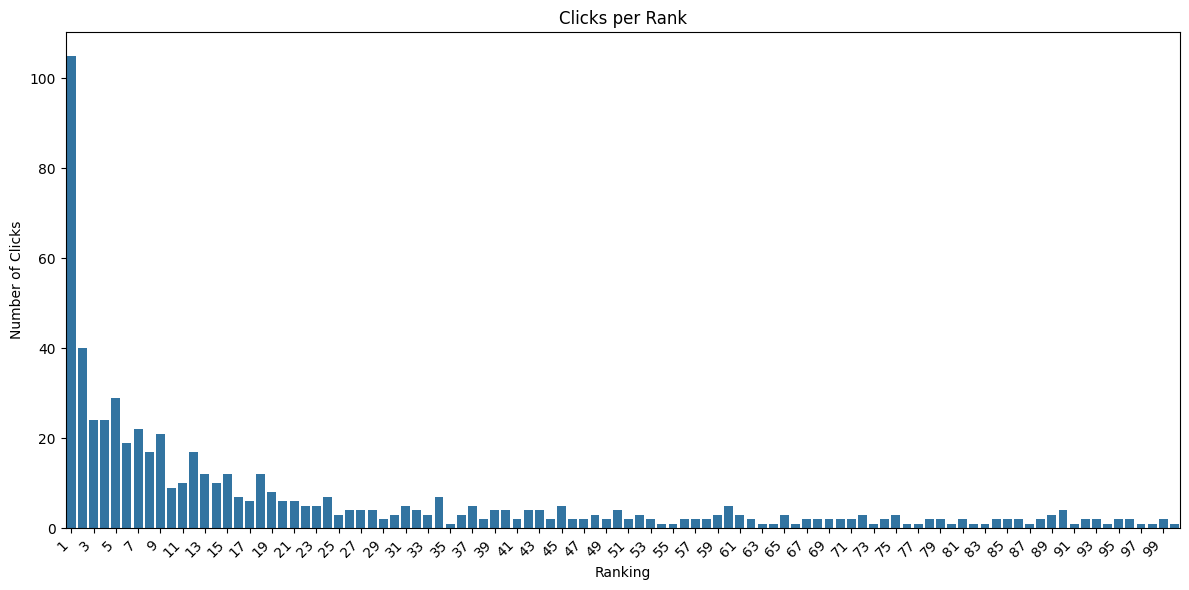

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=count_rank.index, y=count_rank['num_clicks'])
n=2
plt.xticks(range(0,len(count_rank.index),n),rotation=45, ha='right')
plt.title('Clicks per Rank')
plt.xlabel('Ranking')
plt.ylabel('Number of Clicks')
plt.tight_layout()
plt.show()

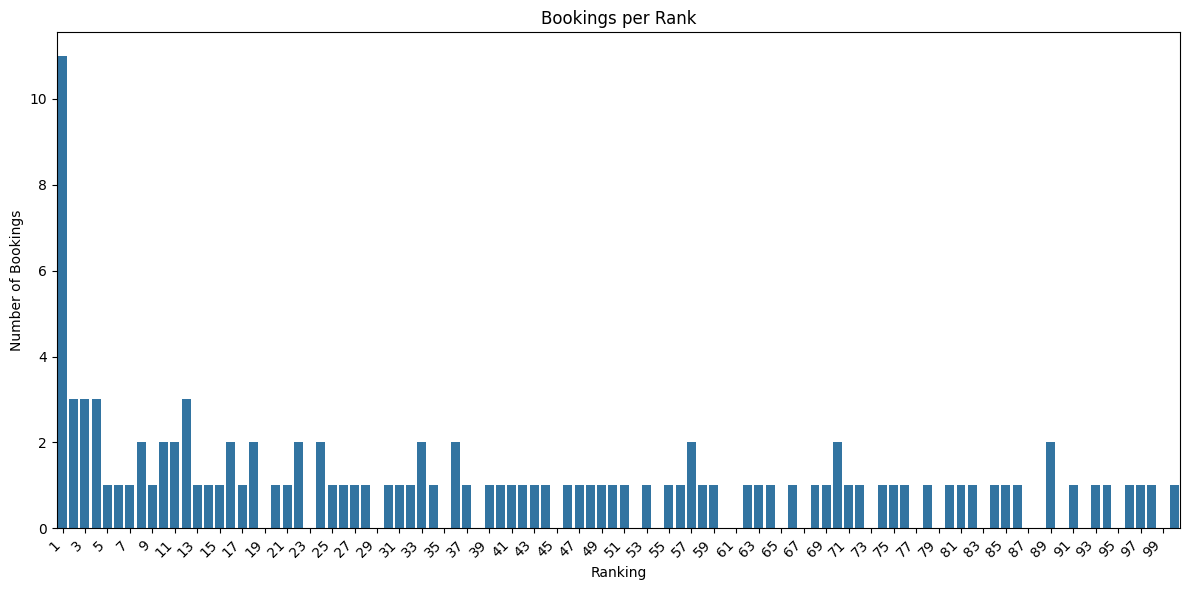

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=count_rank.index, y=count_rank['is_trans'])
n=2
plt.xticks(range(0,len(count_rank.index),n),rotation=45, ha='right')
plt.title('Bookings per Rank')
plt.xlabel('Ranking')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

In [ ]:
grouped_rr = df_merged.groupby('review_rating').sum()
grouped_rr.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
review_rating,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,001bbff3030c95740d4c55bb72e823e9001bbff3030c95...,541933a931216d270f53277c2de068d0541933a931216d...,2021-07-02T19:38:00.000Z2021-07-02T19:38:00.00...,41834,66207,4838,62846078,2021-07-042021-07-042021-07-042021-07-042021-0...,2021-07-052021-07-052021-07-052021-07-052021-0...,19828,2245,2,9624,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0PRICE:0PRICE:0PRICE:0PRICE...,523774,34059951634,16,0.0,10066.0,2598,1152,15146.0,11,0,2949.0,220.0,319.0,120.0,366.0,2308.0,3699.0,1094.0,184.0,755.0,845.0,383.0,1553.0,359.0,246.0,2091.0,567.0,113.0
1.0,0152236295041a611d45ed97353d73df017a2c4b88aee8...,02e111bc0c86ce83b159f0617b98920d61d994c9a6c3b6...,2021-06-10T14:53:00.000Z2021-07-31T23:09:00.00...,985,2827,65,939060,2021-06-102021-08-042021-06-182021-08-022021-0...,2021-06-112021-08-052021-06-192021-08-032021-0...,348,23,0,154,PRICE ASCENDINGRECOMMENDEDRECOMMENDEDRECOMMEND...,VIPONLY:FALSEVIPONLY:FALSEPRICE:0AMENITY:19|AM...,9255,485119654,2,3850.0,267.0,33,29,246.0,0,0,69.0,18.0,16.0,3.0,8.0,55.0,87.0,14.0,8.0,9.0,46.0,21.0,31.0,3.0,10.0,29.0,10.0,3.0
2.0,001bbff3030c95740d4c55bb72e823e9013f92616fe583...,541933a931216d270f53277c2de068d0a359fd984e5ae5...,2021-07-02T19:38:00.000Z2021-07-07T20:49:00.00...,1685,4022,332,2141437,2021-07-042021-08-302021-08-302021-08-302021-0...,2021-07-052021-09-042021-09-042021-09-042021-0...,1179,39,0,638,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEVIPONLY:FALSEVIPONLY:FALSEVIPONLY...,32591,2133213298,12,199625.0,1442.0,291,245,889.0,0,0,414.0,47.0,67.0,14.0,66.0,422.0,560.0,68.0,35.0,59.0,268.0,115.0,236.0,2.0,16.0,155.0,15.0,25.0
3.0,001bbff3030c95740d4c55bb72e823e9001bbff3030c95...,541933a931216d270f53277c2de068d0541933a931216d...,2021-07-02T19:38:00.000Z2021-07-02T19:38:00.00...,14851,29378,2733,14882177,2021-07-042021-07-042021-07-042021-07-042021-0...,2021-07-052021-07-052021-07-052021-07-052021-0...,9992,617,4,5340,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEVIPONLY:FALSEVIPONLY:FALSEVIPONLY...,244762,18159465647,177,4182425.0,13024.0,2803,2387,8091.0,40,4,2802.0,380.0,1107.0,135.0,1085.0,3806.0,4926.0,967.0,437.0,534.0,3211.0,819.0,2178.0,35.0,275.0,1620.0,112.0,211.0
4.0,001bbff3030c95740d4c55bb72e823e9001bbff3030c95...,541933a931216d270f53277c2de068d0541933a931216d...,2021-07-02T19:38:00.000Z2021-07-02T19:38:00.00...,123453,185629,15136,74108682,2021-07-042021-07-042021-07-042021-07-042021-0...,2021-07-052021-07-052021-07-052021-07-052021-0...,69357,5886,79,33948,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEVIPONLY:FALSEVIPONLY:FALSEVIPONLY...,1365720,118590970652,1722,34100650.0,109202.0,18789,17533,84177.0,428,87,14795.0,4051.0,18012.0,2206.0,8522.0,18026.0,30722.0,18420.0,7960.0,7182.0,25990.0,10796.0,11707.0,177.0,6403.0,14625.0,1240.0,2805.0


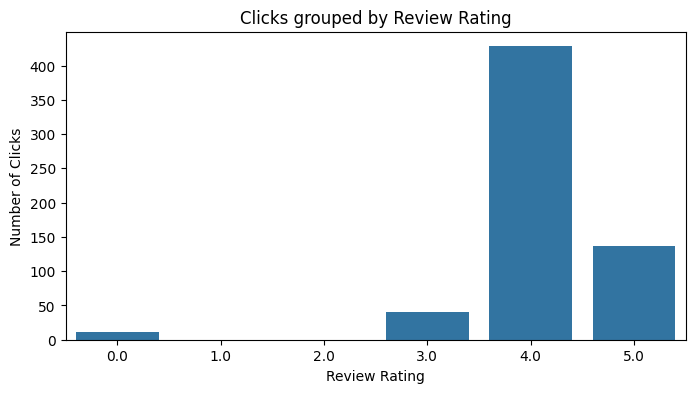

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=grouped_rr.index, y=grouped_rr['num_clicks'])
plt.xlabel('Review Rating')
plt.ylabel('Number of Clicks')
plt.title('Clicks grouped by Review Rating')
plt.show()

In [ ]:
grouped_rr = df_merged.groupby('review_rating').agg({'num_clicks':'mean'})
grouped_rr.head()

,num_clicks
review_rating,
0.0,0.001146
1.0,0.000000
2.0,0.000000
3.0,0.007520
4.0,0.012731


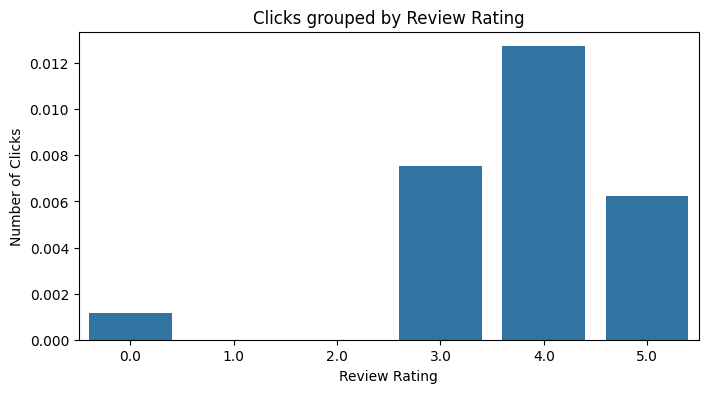

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=grouped_rr.index, y=grouped_rr['num_clicks'])
plt.xlabel('Review Rating')
plt.ylabel('Number of Clicks')
plt.title('Clicks grouped by Review Rating')
plt.show()

In [ ]:
df_pb = df_merged.groupby('price_bucket').sum()

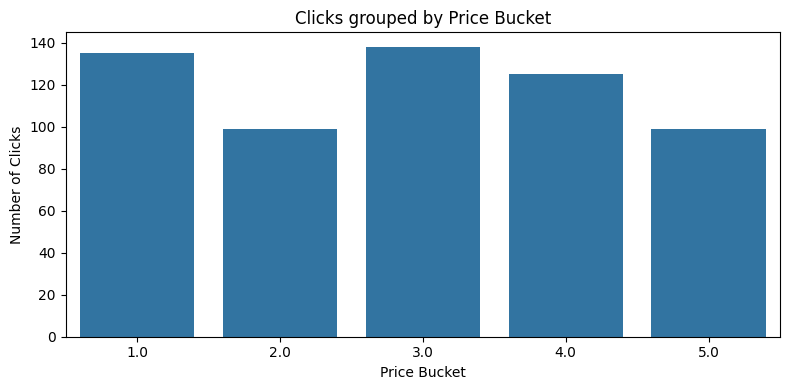

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=df_pb.index, y=df_pb['num_clicks'])
plt.xlabel('Price Bucket')
plt.ylabel('Number of Clicks')
plt.title('Clicks grouped by Price Bucket')
plt.tight_layout()
plt.show()

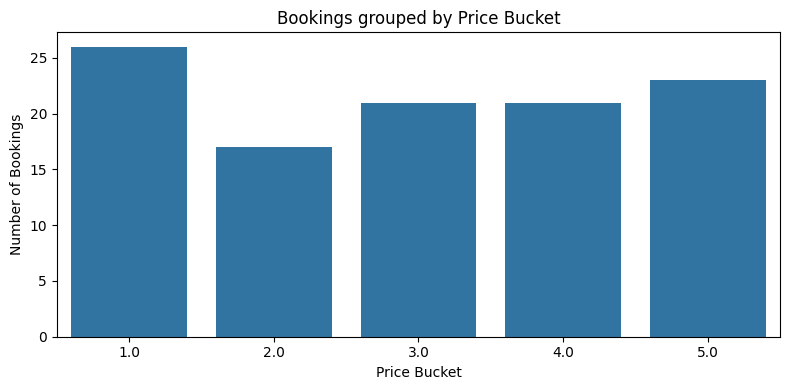

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=df_pb.index, y=df_pb['is_trans'])
plt.xlabel('Price Bucket')
plt.ylabel('Number of Bookings')
plt.title('Bookings grouped by Price Bucket')
plt.tight_layout()
plt.show()

In [ ]:
click_counts = df_merged.groupby('price_bucket')['num_clicks'].sum().reset_index()
click_counts

,price_bucket,num_clicks
0,1.0,135
1,2.0,99
2,3.0,138
3,4.0,125
4,5.0,99


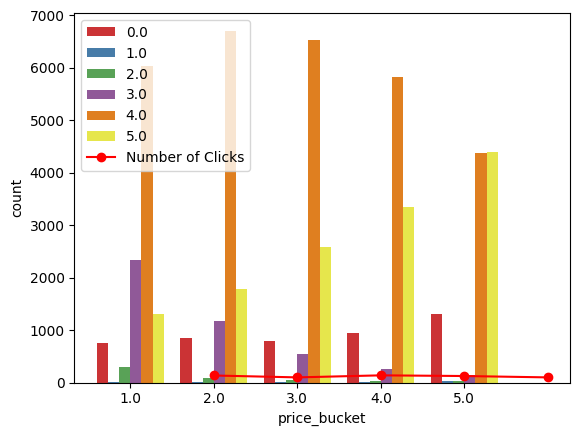

In [ ]:
sns.countplot(x='price_bucket', hue='review_rating', data=df_merged, palette='Set1', dodge=True)

plt.plot(click_counts['price_bucket'], click_counts['num_clicks'], marker='o', color='red', label='Number of Clicks')

plt.legend()

plt.show()

In [ ]:
df2 = df_merged.groupby('prop_id')['num_clicks'].sum()
df2 = df2.sort_values(ascending=False)
df2.head()


prop_id
1879505    9
2421824    7
6562724    6
4189323    6
1214332    6
Name: num_clicks, dtype: int64

In [ ]:
df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_merged.shape

(71307, 44)

In [ ]:
df_merged['sort_type'].value_counts()

sort_type
RECOMMENDED                      67251
PRICE ASCENDING                   2320
GUEST RATINGS DESCENDING           685
SPECIAL - DIRECT HOTEL SEARCH      546
STAR RATING DESCENDING             400
VACATION RENTAL                    105
Name: count, dtype: int64